## Bike Sharing Assignament

- Steps to follow :
  - Reading, understanding and visualizing the data
  - Preparing the data for modelling
  - Training the model
  - Residual Analysis
  - Prediciton and evaluation on the Test set

### Importing Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

### Reading the Dataset

In [2]:
df = pd.read_csv("day.csv")

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#Shape of the DataSet
df.shape

(730, 16)

- DataSet contain 16 columns with 730 rows of data

In [5]:
#Information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 88.5+ KB


- while looking into the data, it tells us that except 'dteday' other columns are either float or integer.
- But form the data dictionary we recognized that few are categorical columns but still it is represent in folat or integer datatype.
- Based on our further Analysis lets decide on the Categorical variables.

In [6]:
# Checking for Statictics Details of the Data
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Checking for Duplicates

In [7]:
# Create a dummy dataframe for duplicate check.
df_duplicate = df

#checking and dropping the duplicates if any.
df_duplicate.drop_duplicates(subset=None, inplace=True)

In [8]:
#Checking for shape of dataset before and after dropping duplicates
print(df.shape)
print(df_duplicate.shape)

(730, 16)
(730, 16)


- since both shape of the DataSet are exactly similar, There is no duplicate rows present.
- Hence we will continue with the df dataset itself

### Removing unwanted Columns

- Looking into the data with reference to the data dictionary, following inference was done.
 - 'instant' : It only tells the idex value, more over like an id. We could not compute further information in it. We can drop this column.
 - 'dteday' : since we have a 'year' and 'month' column seperately. We can drop these columns.
 - 'casual & Registered' : These columns contains the count of bikes booked by different categories of customers. 
    since we already have a column called 'cnt' which contain the summation of both 'casual & Registered' column. 
    we can drop both the columns for our further Analysis.

In [9]:
#Creating a new variable to hold the dataset. so that the old dataset df will be preserved for future Analysis id needed.
df_bike = df

In [10]:
print(df.shape)
print(df_bike.shape)

(730, 16)
(730, 16)


In [11]:
#Dropping instant column
df_bike.drop(['instant'], axis = 1, inplace = True)

#Dropping dteday column
df_bike.drop(['dteday'], axis = 1, inplace = True)

#Dropping casual Column
df_bike.drop(['casual'], axis = 1, inplace = True)

#Dropping Registered column
df_bike.drop(['registered'], axis = 1, inplace = True)

In [12]:
df_bike.shape

(730, 12)

- From above shape result it tells us that the dataset contains only 730 rows and 12 columns.
- Hence all the four uuwanted columns based on our assumptions are dropped successfully.

### Handling Missing Values

We are aware from the inforamtion of the dataset that there are no missing values. However we will verify that.

In [13]:
df_bike.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

There are no null values in all 12 columns of Data

In [14]:
df_bike.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


### Handling Outliers

- checking for outliers in independent variables with continous values
- Columns: temp, atemp, hum, windspeed

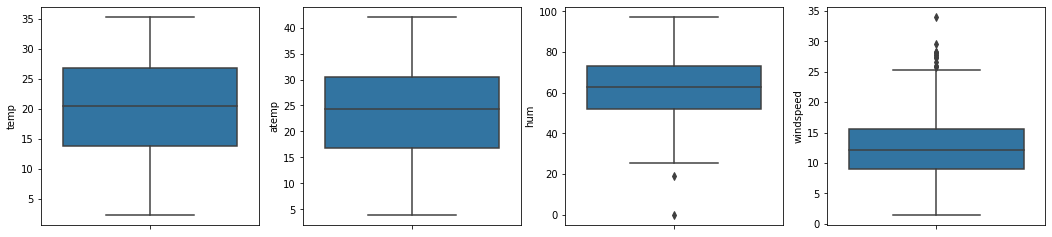

In [15]:
plt.figure(figsize=(18,4))
plt.subplot(1,4,1)
sns.boxplot(y='temp',data=df_bike)
plt.subplot(1,4,2)
sns.boxplot(y='atemp',data=df_bike)
plt.subplot(1,4,3)
sns.boxplot(y='hum',data=df_bike)
plt.subplot(1,4,4)
sns.boxplot(y='windspeed',data=df_bike)
plt.show()

- From these plots we can interpret that dataset is good and we dont want to handle the outliers

In [16]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 74.1 KB


- As per the data dictionary columns like season, weathersit, mnth,weekday comes with some categories.
- Hence we can replace these columns with appropriate datatypes and Actual values from data dictionary.

In [17]:
# Converting to Category datatype
df_bike['season'] = df_bike['season'].astype('category')
df_bike['weathersit'] = df_bike['weathersit'].astype('category')
df_bike['mnth'] = df_bike['mnth'].astype('category')
df_bike['weekday'] = df_bike['weekday'].astype('category')
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 55.0 KB


- Assumption to convert Weathersit categorical value :
  - Clear, Few clouds, Partly cloudy, Partly cloudy AS  "good"
  - Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist AS "moderate"
  - Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds AS "bad"
  - Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog AS "severe"

In [18]:
# Converting the values of categorical types
df_bike.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"}, inplace=True)
df_bike.weathersit.replace({1:'good', 2:'moderate', 3:'bad', 4:'severe'}, inplace=True)
df_bike.mnth = df_bike.mnth.replace({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
df_bike.weekday = df_bike.weekday.replace({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
df_bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600


Finding liner relationship in contionous numeric vaiables using seaborn 

<Figure size 1440x2160 with 0 Axes>

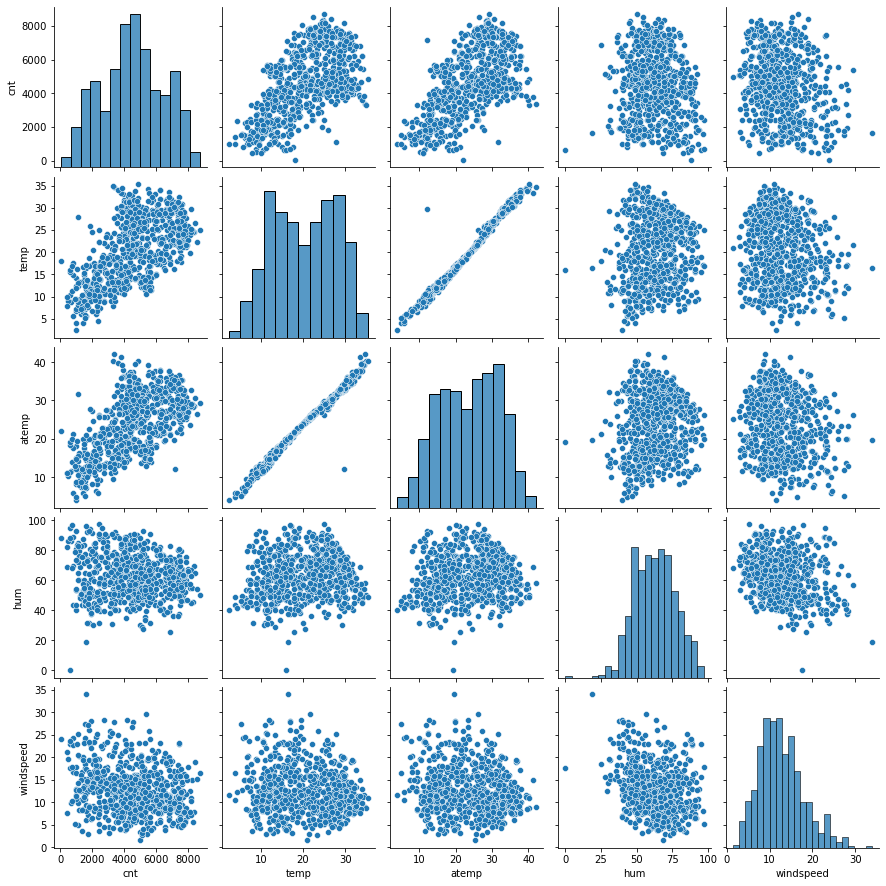

In [19]:
plt.figure(figsize=(20,30))
sns.pairplot(data=df_bike, vars = ['cnt','temp','atemp','hum','windspeed'])
plt.show()

#### Inference
- Looks like varaible temp and atemp has a linera relationship with cnt varaible.
- Varaible for temperature and actual temperature are highly correlated.

### Analysing Categorical Varaible with target varaibles 

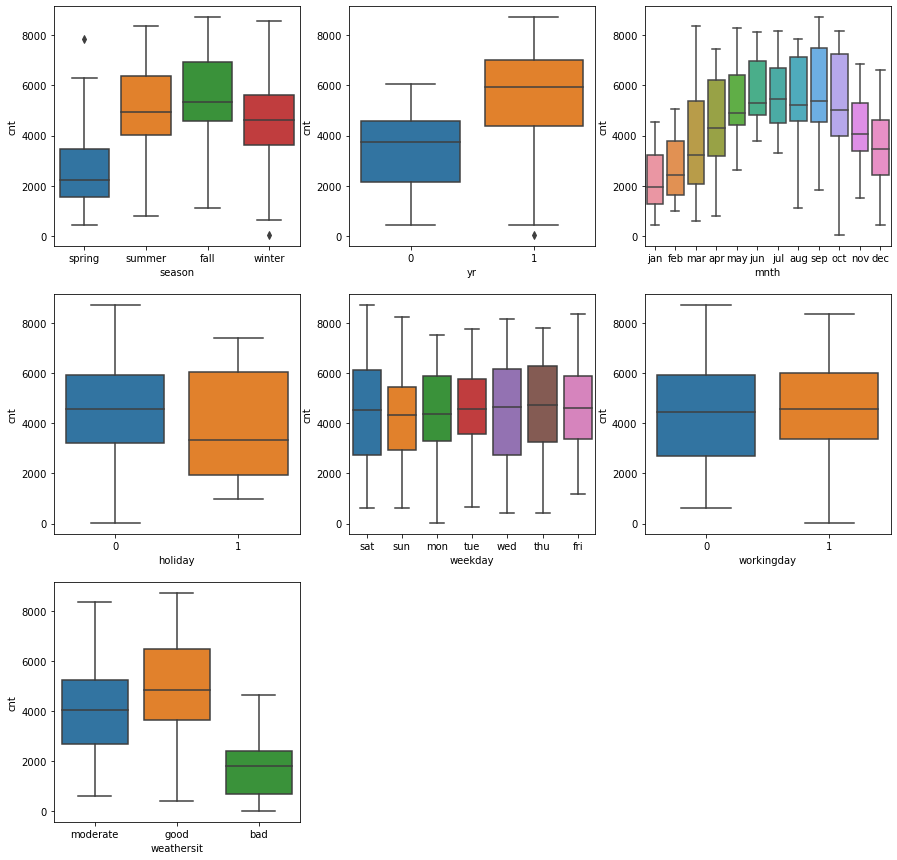

In [20]:
# Categorical Varaibles : 'season','yr','mnth','holiday','weekday','workignday','weathersit'
plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
sns.boxplot(x='season',y='cnt',data=df_bike)
plt.subplot(3,3,2)
sns.boxplot(x='yr', y='cnt',data=df_bike)
plt.subplot(3,3,3)
sns.boxplot(x='mnth', y='cnt',data=df_bike)
plt.subplot(3,3,4)
sns.boxplot(x='holiday', y='cnt',data=df_bike)
plt.subplot(3,3,5)
sns.boxplot(x='weekday', y='cnt',data=df_bike)
plt.subplot(3,3,6)
sns.boxplot(x='workingday', y='cnt',data=df_bike)
plt.subplot(3,3,7)
sns.boxplot(x='weathersit', y='cnt',data=df_bike)
plt.show()

#### Observations:
     - During fall season the demand for bike increase.
     - Demand for bike increases in successive years.
     - Considering month, the demand increase till july progressively and the demand for bike decreases in the month of Oct,             Nov and Dec. Assuming that the demand decreses due to some festive season and holidays are moe in that month.
     - From the above point the same can be correlated like as there is a holiday there is a decreased in bike demand.
     - weekday is not showing any trends like increasing or decreasing, the demand is same across the weekdays.
     - When the weather is good ie(Clear, Few clouds, Partly cloudy, Partly cloudy) the demand for bike is highest.

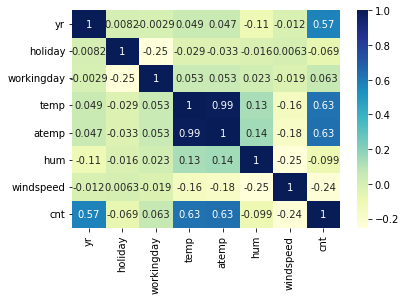

In [21]:
#Correlation of varaibles 
sns.heatmap(df_bike.corr(),annot = True, cmap = 'YlGnBu')
plt.show()

In [22]:
#Dropping atemp column due to multicollinearity
df_bike.drop(['atemp'], axis = 1, inplace = True)

Temp and atemp are highly correlated to each other, from the heat map it indicates that both columns have similar set of values.

### Creating dummy Varaibles

In [23]:
#copying the cleaned dataset to another varaible to preserve the old set for future analysis.
bike = df_bike

# Below code does the following:
# 1. Creates a dummy varaible.
# 2. Drops original varaible for which dummy varaible was created.
# 3. Drops first dummy varaible for each set of dummy vales created.
bike = pd.get_dummies(bike, drop_first=True)
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   730 non-null    int64  
 1   holiday              730 non-null    int64  
 2   workingday           730 non-null    int64  
 3   temp                 730 non-null    float64
 4   hum                  730 non-null    float64
 5   windspeed            730 non-null    float64
 6   cnt                  730 non-null    int64  
 7   season_spring        730 non-null    uint8  
 8   season_summer        730 non-null    uint8  
 9   season_winter        730 non-null    uint8  
 10  mnth_aug             730 non-null    uint8  
 11  mnth_dec             730 non-null    uint8  
 12  mnth_feb             730 non-null    uint8  
 13  mnth_jan             730 non-null    uint8  
 14  mnth_jul             730 non-null    uint8  
 15  mnth_jun             730 non-null    uin

In [24]:
bike.shape

(730, 29)

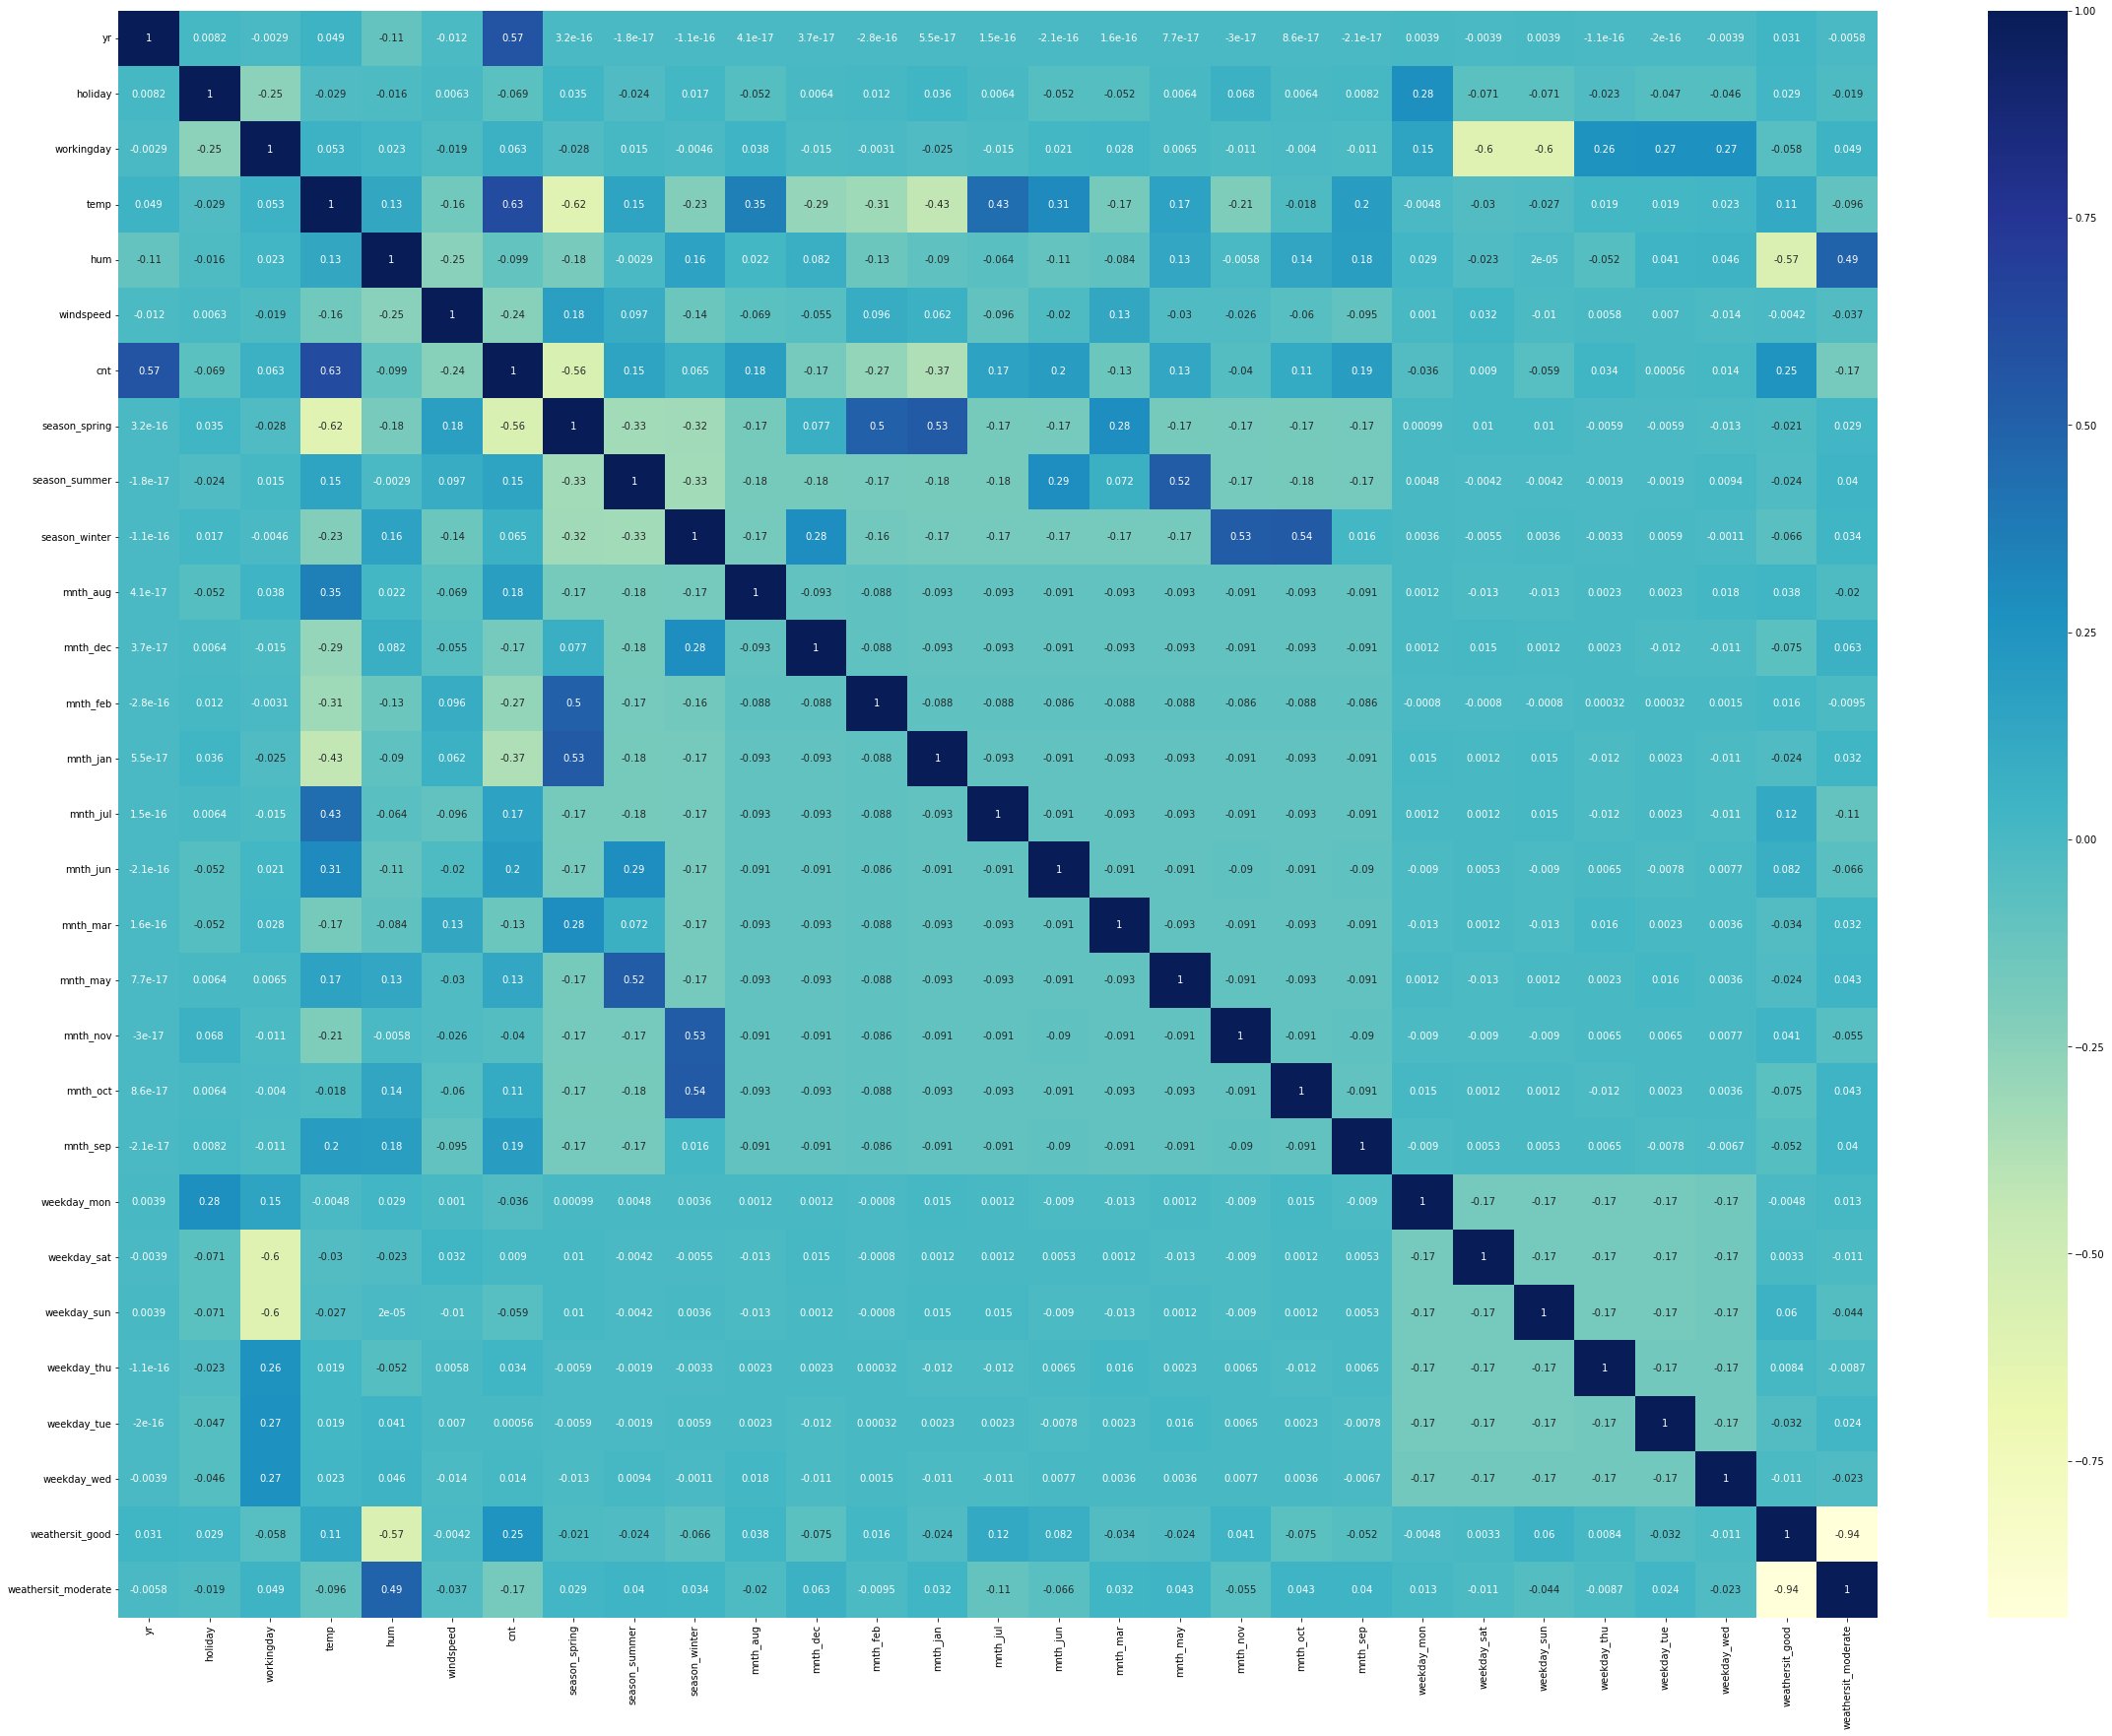

In [25]:
#Correlation Matrix

plt.figure(figsize=(40,30))
sns.heatmap(bike.corr(), annot=True, cmap="YlGnBu")
plt.show()

### Splitting Data into train and test sets.

In [26]:
# Splitting the data with training ratio of 70 and test ratio of 30 percent
df_train, df_test = train_test_split(bike, train_size = 0.7, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


### MIN MAX Scaling on Continous Variables.

In [27]:
#Min Max Scaling (Normalisation) : Between 0 and 1

# 1.instantiate the object
scaler = MinMaxScaler()

# create a list of numeric variables
num_vars = ['temp','hum','windspeed','cnt']


# 2. Fit in data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,1,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,1,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.751824,0.380981,0.191095,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [28]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,...,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.625490,0.345098
std,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,...,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.484471,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Min Max Scaling was applied successfully, in the abov results we can see that all values are between 0 and 1 which makes easy for further Analysis

## Building a Linear Model

In [29]:
# Dividing a df_train into X_train and Y_train sets respectively.
y_train = df_train.pop('cnt')
X_train = df_train

#### Build a model using RFE 

##### Use RFE Approach to eliminate some columns

In [30]:
#Running RFE with the output number of varaibles equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,15)
rfe = rfe.fit(X_train, y_train)

In [31]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 7),
 ('mnth_dec', False, 4),
 ('mnth_feb', False, 5),
 ('mnth_jan', False, 2),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 13),
 ('mnth_mar', False, 14),
 ('mnth_may', False, 6),
 ('mnth_nov', False, 3),
 ('mnth_oct', False, 10),
 ('mnth_sep', True, 1),
 ('weekday_mon', False, 8),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 11),
 ('weekday_tue', False, 9),
 ('weekday_wed', False, 12),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

In [32]:
#Select column based on rfesupport 
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_jul',
       'mnth_sep', 'weekday_sat', 'weekday_sun', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [33]:
# Columns not supported by rfesupport
X_train.columns[~rfe.support_]

Index(['mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'weekday_mon', 'weekday_thu',
       'weekday_tue', 'weekday_wed'],
      dtype='object')

In [34]:
# Adding RFE support columns to the X_train dataset.
col = X_train.columns[rfe.support_]

In [35]:
X_train_rfe = X_train[col]

### Model 1: With RFE Supported Columns

In [36]:
# build a model with all variables
X_train_sm = sm.add_constant(X_train_rfe)

# Create a MOdel
lr = sm.OLS(y_train, X_train_sm)

# Fit a model
lr_model = lr.fit()

# Params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Tue, 10 May 2022   Prob (F-statistic):          2.11e-191
Time:                        20:07:36   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0035      0.038      0.093      0.926      -0.071       0.078
yr                      0.2298      0.008     28.647      0.000       0.214       0.246
holiday                -0.0674      0.022     -3.012      0.003      -0.111      -0.023
workingday              0.0347      0.011      3.044      0.002       0.012       0.057
temp                    0.5277      0.033     15.884      0.000       0.462       0.593
hum                    -0.1611      0.037     -4.313      0.000      -0.234      -0.088
windspeed              -0.1809      0.025     -7.118      0.000      -0.231      -0.131
season_spring          -0.0555      0.021     -2.698      0.007      -0.096      -0.015
season_summer           0.0537      0.015      3.631      0.000       0.025       0.083
season_winter           0.0992      0.017      5.815      0.000       0.066       0.133
mnth_jul               -0.0546      0.018     -3.019      0.003      -0.090      -0.019
mnth_sep                0.0820      0.017      4.966      0.000       0.050       0.114
weekday_sat             0.0447      0.013      3.422      0.001       0.019       0.070
weekday_sun            -0.0084      0.014     -0.599      0.550      -0.036       0.019
weathersit_good         0.2450      0.026      9.395      0.000       0.194       0.296
weathersit_moderate     0.1887      0.025      7.641      0.000       0.140       0.237
==============================================================================
Omnibus:                       64.769   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.630
Skew:                          -0.663   Prob(JB):                     9.73e-35
Kurtosis:                       5.369   Cond. No.                     1.68e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.03e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [37]:
#Checking for VIF values of the varaibles

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF", ascending= False)
vif

,Features,VIF
2,workingday,94.54
11,weekday_sat,22.15
12,weekday_sun,21.46
13,weathersit_good,10.25
14,weathersit_moderate,8.87
6,season_spring,5.02
1,holiday,4.66
3,temp,3.62
8,season_winter,3.49
7,season_summer,2.62


### Model 2: Removing feature workingday

- Workingday feature is removed due to high VIF value

In [38]:
X_train_rfe.drop(["workingday"], axis = 1, inplace = True)
#df_bike.drop(['atemp'], axis = 1, inplace = True)

In [39]:
# build a model with all variables
X_train_sm = sm.add_constant(X_train_rfe)

# Create a MOdel
lr = sm.OLS(y_train, X_train_sm)

# Fit a model
lr_model = lr.fit()

# Params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Tue, 10 May 2022   Prob (F-statistic):          2.11e-191
Time:                        20:08:01   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0382      0.047      0.819      0.413      -0.053       0.130
yr                      0.2298      0.008     28.647      0.000       0.214       0.246
holiday                -0.1021      0.025     -4.024      0.000      -0.152      -0.052
temp                    0.5277      0.033     15.884      0.000       0.462       0.593
hum                    -0.1611      0.037     -4.313      0.000      -0.234      -0.088
windspeed              -0.1809      0.025     -7.118      0.000      -0.231      -0.131
season_spring          -0.0555      0.021     -2.698      0.007      -0.096      -0.015
season_summer           0.0537      0.015      3.631      0.000       0.025       0.083
season_winter           0.0992      0.017      5.815      0.000       0.066       0.133
mnth_jul               -0.0546      0.018     -3.019      0.003      -0.090      -0.019
mnth_sep                0.0820      0.017      4.966      0.000       0.050       0.114
weekday_sat             0.0100      0.011      0.897      0.370      -0.012       0.032
weekday_sun            -0.0430      0.012     -3.725      0.000      -0.066      -0.020
weathersit_good         0.2450      0.026      9.395      0.000       0.194       0.296
weathersit_moderate     0.1887      0.025      7.641      0.000       0.140       0.237
==============================================================================
Omnibus:                       64.769   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.630
Skew:                          -0.663   Prob(JB):                     9.73e-35
Kurtosis:                       5.369   Cond. No.                         26.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
#Checking for VIF values of the varaibles

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF", ascending= False)
vif

,Features,VIF
3,hum,24.70
2,temp,21.15
12,weathersit_good,14.18
13,weathersit_moderate,8.75
5,season_spring,5.47
4,windspeed,4.63
7,season_winter,4.01
6,season_summer,3.18
0,yr,2.09
8,mnth_jul,1.59


### Model 3: Removing hum feature from dataset
- hum feature is removed due to high VIF Value and Negative coefficient which makes the feture to be insignificant for the model

In [41]:
X_train_rfe.drop(["hum"], axis = 1, inplace = True)

In [42]:
# build a model with all variables
X_train_sm = sm.add_constant(X_train_rfe)

# Create a MOdel
lr = sm.OLS(y_train, X_train_sm)

# Fit a model
lr_model = lr.fit()

# Params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Tue, 10 May 2022   Prob (F-statistic):          1.28e-188
Time:                        20:08:11   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0858      0.037     -2.301      0.022      -0.159      -0.013
yr                      0.2337      0.008     28.828      0.000       0.218       0.250
holiday                -0.1029      0.026     -3.983      0.000      -0.154      -0.052
temp                    0.4915      0.033     15.027      0.000       0.427       0.556
windspeed              -0.1491      0.025     -6.024      0.000      -0.198      -0.100
season_spring          -0.0655      0.021     -3.147      0.002      -0.106      -0.025
season_summer           0.0477      0.015      3.180      0.002       0.018       0.077
season_winter           0.0846      0.017      4.971      0.000       0.051       0.118
mnth_jul               -0.0496      0.018     -2.702      0.007      -0.086      -0.014
mnth_sep                0.0759      0.017      4.537      0.000       0.043       0.109
weekday_sat             0.0118      0.011      1.037      0.300      -0.011       0.034
weekday_sun            -0.0461      0.012     -3.931      0.000      -0.069      -0.023
weathersit_good         0.2895      0.024     11.880      0.000       0.242       0.337
weathersit_moderate     0.2074      0.025      8.383      0.000       0.159       0.256
==============================================================================
Omnibus:                       66.828   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.148
Skew:                          -0.682   Prob(JB):                     6.17e-36
Kurtosis:                       5.402   Cond. No.                         20.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
#Checking for VIF values of the varaibles


vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF", ascending= False)
vif

,Features,VIF
11,weathersit_good,14.13
2,temp,12.56
12,weathersit_moderate,7.94
3,windspeed,4.61
4,season_spring,4.00
5,season_summer,2.74
6,season_winter,2.66
0,yr,2.07
7,mnth_jul,1.59
8,mnth_sep,1.35


### Model 4: Removing weekday_sat feature from the dataset.
- weekday_sat is removed based on the high p value when compared to other features.

In [44]:
X_train_rfe.drop(["weekday_sat"], axis = 1, inplace = True)

In [45]:
# build a model with all variables
X_train_sm = sm.add_constant(X_train_rfe)

# Create a MOdel
lr = sm.OLS(y_train, X_train_sm)

# Fit a model
lr_model = lr.fit()

# Params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.9
Date:                Tue, 10 May 2022   Prob (F-statistic):          1.45e-189
Time:                        20:08:36   Log-Likelihood:                 507.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     497   BIC:                            -934.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0835      0.037     -2.241      0.025      -0.157      -0.010
yr                      0.2335      0.008     28.807      0.000       0.218       0.249
holiday                -0.1052      0.026     -4.089      0.000      -0.156      -0.055
temp                    0.4907      0.033     15.004      0.000       0.426       0.555
windspeed              -0.1479      0.025     -5.981      0.000      -0.196      -0.099
season_spring          -0.0655      0.021     -3.147      0.002      -0.106      -0.025
season_summer           0.0475      0.015      3.171      0.002       0.018       0.077
season_winter           0.0848      0.017      4.984      0.000       0.051       0.118
mnth_jul               -0.0492      0.018     -2.680      0.008      -0.085      -0.013
mnth_sep                0.0760      0.017      4.541      0.000       0.043       0.109
weekday_sun            -0.0483      0.012     -4.191      0.000      -0.071      -0.026
weathersit_good         0.2895      0.024     11.878      0.000       0.242       0.337
weathersit_moderate     0.2073      0.025      8.380      0.000       0.159       0.256
==============================================================================
Omnibus:                       63.016   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.263
Skew:                          -0.633   Prob(JB):                     4.30e-35
Kurtosis:                       5.417   Cond. No.                         20.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
#Checking for VIF values of the varaibles
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF", ascending= False)
vif

,Features,VIF
10,weathersit_good,14.10
2,temp,12.55
11,weathersit_moderate,7.92
3,windspeed,4.59
4,season_spring,3.99
5,season_summer,2.74
6,season_winter,2.65
0,yr,2.07
7,mnth_jul,1.59
8,mnth_sep,1.35


### Model 5: Dropping weathersit_good feature
- weather_fit value is removed based on high VIF value

In [47]:
#Removing  season_spring 
X_train_rfe.drop(["weathersit_good"], axis = 1, inplace = True)

In [48]:
# build a model with all variables
X_train_sm = sm.add_constant(X_train_rfe)

# Create a MOdel
lr = sm.OLS(y_train, X_train_sm)

# Fit a model
lr_model = lr.fit()

# Params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     176.4
Date:                Tue, 10 May 2022   Prob (F-statistic):          7.54e-164
Time:                        20:09:08   Log-Likelihood:                 443.93
No. Observations:                 510   AIC:                            -863.9
Df Residuals:                     498   BIC:                            -813.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1926      0.033      5.845      0.000       0.128       0.257
yr                      0.2390      0.009     26.095      0.000       0.221       0.257
holiday                -0.0904      0.029     -3.106      0.002      -0.148      -0.033
temp                    0.5031      0.037     13.599      0.000       0.430       0.576
windspeed              -0.1776      0.028     -6.378      0.000      -0.232      -0.123
season_spring          -0.0584      0.024     -2.481      0.013      -0.105      -0.012
season_summer           0.0504      0.017      2.968      0.003       0.017       0.084
season_winter           0.0743      0.019      3.861      0.000       0.036       0.112
mnth_jul               -0.0523      0.021     -2.514      0.012      -0.093      -0.011
mnth_sep                0.0665      0.019      3.513      0.000       0.029       0.104
weekday_sun            -0.0412      0.013     -3.162      0.002      -0.067      -0.016
weathersit_moderate    -0.0684      0.010     -7.059      0.000      -0.087      -0.049
==============================================================================
Omnibus:                      141.545   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              535.361
Skew:                          -1.222   Prob(JB):                    5.60e-117
Kurtosis:                       7.384   Cond. No.                         17.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
#Checking for VIF values of the varaibles
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF", ascending= False)
vif

,Features,VIF
2,temp,5.14
3,windspeed,4.54
5,season_summer,2.23
4,season_spring,2.11
0,yr,2.06
6,season_winter,1.78
7,mnth_jul,1.59
10,weathersit_moderate,1.53
8,mnth_sep,1.33
9,weekday_sun,1.18


### Model 6: Dropping season_spring feature
- season_spring is dropped based on negative coefficent and high p value compared to other feature

In [50]:
#Removing  mnth_jul 
X_train_rfe.drop(["season_spring"], axis = 1, inplace = True)

In [51]:
# build a model with all variables
X_train_sm = sm.add_constant(X_train_rfe)

# Create a MOdel
lr = sm.OLS(y_train, X_train_sm)

# Fit a model
lr_model = lr.fit()

# Params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     191.4
Date:                Tue, 10 May 2022   Prob (F-statistic):          1.12e-163
Time:                        20:09:25   Log-Likelihood:                 440.80
No. Observations:                 510   AIC:                            -859.6
Df Residuals:                     499   BIC:                            -813.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1253      0.019      6.668      0.000       0.088       0.162
yr                      0.2378      0.009     25.866      0.000       0.220       0.256
holiday                -0.0927      0.029     -3.173      0.002      -0.150      -0.035
temp                    0.5716      0.025     23.092      0.000       0.523       0.620
windspeed              -0.1826      0.028     -6.543      0.000      -0.237      -0.128
season_summer           0.0798      0.012      6.541      0.000       0.056       0.104
season_winter           0.1122      0.012      9.576      0.000       0.089       0.135
mnth_jul               -0.0419      0.020     -2.049      0.041      -0.082      -0.002
mnth_sep                0.0797      0.018      4.363      0.000       0.044       0.116
weekday_sun            -0.0419      0.013     -3.197      0.001      -0.068      -0.016
weathersit_moderate    -0.0679      0.010     -6.970      0.000      -0.087      -0.049
==============================================================================
Omnibus:                      133.855   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              465.271
Skew:                          -1.182   Prob(JB):                    9.28e-102
Kurtosis:                       7.038   Cond. No.                         10.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
#Checking for VIF values of the varaibles


vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF", ascending= False)
vif

,Features,VIF
2,temp,5.10
3,windspeed,3.05
0,yr,2.00
4,season_summer,1.76
6,mnth_jul,1.52
9,weathersit_moderate,1.47
5,season_winter,1.44
7,mnth_sep,1.29
8,weekday_sun,1.16
1,holiday,1.04


In [53]:
lr_model.params

const                  0.125255
yr                     0.237783
holiday               -0.092736
temp                   0.571646
windspeed             -0.182602
season_summer          0.079782
season_winter          0.112224
mnth_jul              -0.041943
mnth_sep               0.079663
weekday_sun           -0.041903
weathersit_moderate   -0.067851
dtype: float64

### Inference : All our Coefficient are not equal to zero, which mean We REJECT NULL HYPOTHESIS

##### F-statistics value is used for testing the overall siginificance of the model: 
 - Higher the F-statistics, more significant the model is:
   - F-Statistic : 191.4 (which is greater than 1) states that the overall model is significant.

#### The Equation of best Fitted line as per our model is as follows:

 ###### cnt = 0.125255 + (yr * 0.237783) - (holiday * 0.092736) + (temp * 0.571646) -(windspeed * 0.182602) + (season_summer * 0.079782) + (season_winter * 0.112224) - (mnth_jul * 0.041943) + (mnth_sep * 0.079663) - (weekday_sun * 0.041903) - (weathersit_moderate * 0.067851)

#### Interpretation of Coefficients:
 - temp :  A coefficient value of '0.5716' indicates that a unit increase in temp varaible, increases the bike hire number by 0,5716 units.
 
 - yr: A coefficient value of '0.2377' indicates that a unit increase in yr varaible, increase bike hire number by 0.2377 units.
 
 - holiday: A coefficient value of '-0.0927' indicates that a unit incrases in holiday varaible, decrease the bike hire by 0.0927 unit.
 
 - windspeed: A coefficient value of '-0.1826' indicates that a unit incrases in windspeed varaible, decrease the bike hire by 0.1826 unit.
 
 - season_summer:  A coefficient value of '0.0797' indicates that a unit increase in season_summer varaible, increase bike hire number by 0.0797 units.
 
 - season_winter: A coefficient value of '0.1122' indicates that a unit increase in season_winter varaible, increase bike hire number by 0.1122 units.
 
 - mnth_jul : A coefficient value of '-0.0419' indicates that a unit incrases in mnth_jul varaible, decrease the bike hire by 0.0419 unit.
 
 - mnth_sep:  A coefficient value of '0.0796' indicates that a unit increase in mnth_sep varaible, increase bike hire number by 0.0796 units.
 
 - weekday_sun : A coefficient value of '-0.0419' indicates that a unit incrases in weekday_sun varaible, decrease the bike hire by 0.0419 unit.
 
 - mnth_jul : A coefficient value of '-0.0678' indicates that a unit incrases in mnth_jul varaible, decrease the bike hire by 0.0678 unit.

### Model Evaluation

#### Residual Analysis

## Assumptions

In [54]:
y_train_pred = lr_model.predict(X_train_sm)

<AxesSubplot:ylabel='Density'>

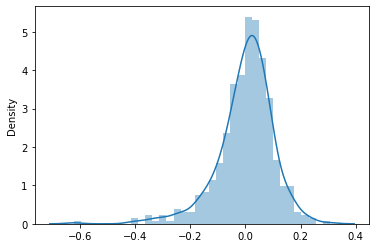

In [55]:
res = y_train - y_train_pred
sns.distplot(res)

#### Assumption 1: Here from above figure we see that errors are normally distributed with mean 0.

#### Linearity Check

<Figure size 1440x2160 with 0 Axes>

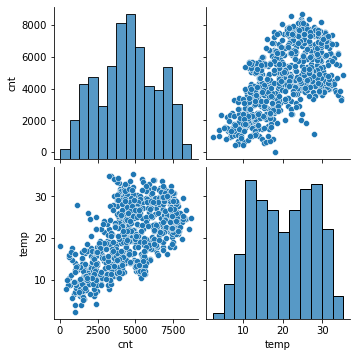

In [56]:
plt.figure(figsize=(20,30))
sns.pairplot(data=df_bike, vars = ['cnt','temp',])
plt.show()

#### Assumption 2:  There is a linear relationship between temp with the predictor cnt feature

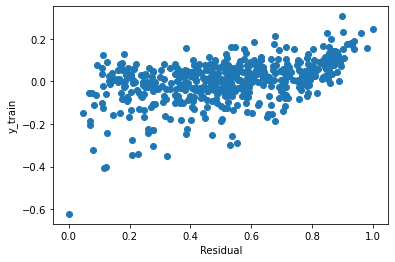

In [57]:
#Using Scatter plot for linaerity check of error terms
plt.scatter(y_train, res)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

In [58]:
#Checking for VIF values of the varaibles


vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF", ascending= False)
vif

,Features,VIF
2,temp,5.10
3,windspeed,3.05
0,yr,2.00
4,season_summer,1.76
6,mnth_jul,1.52
9,weathersit_moderate,1.47
5,season_winter,1.44
7,mnth_sep,1.29
8,weekday_sun,1.16
1,holiday,1.04


#### Assumption 3: There is No Multicollinearity between the predictor varaibles

### Evaluating R^2 value for train data set

In [59]:
r2_score(y_train,y_train_pred)

0.7932127095184529

#### R2 value is same as we obtained in Statsmodel

### Making Predictions Using Final Model

In [60]:
# Applying Scalar to all numeric varaibles in test dataset.
numeric_vars = ['temp','hum','windspeed','cnt']
df_test[numeric_vars] = scaler.transform(df_test[numeric_vars])
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,0,0,1,1,0
299,0,0,1,0.511964,0.837699,0.334206,0.303382,0,0,1,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,1,1,0
152,0,0,1,0.817246,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,0,0,1,0,0,1,0


In [61]:
# Evaluating scaling functionality
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,...,0.086364,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.654545,0.318182
std,0.500809,0.187620,0.459303,0.233187,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,...,0.281541,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.476601,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Splitting the df_test into X_test and y_test

In [62]:
y_test = df_test.pop('cnt')

In [63]:
X_test = df_test

In [64]:
# Providing the same features to test set that were part of final model
X_test = X_test[ X_train_rfe.columns]

# Adding constant to test dataset
X_test_sm = sm.add_constant(X_test)

X_test_sm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   const                220 non-null    float64
 1   yr                   220 non-null    int64  
 2   holiday              220 non-null    int64  
 3   temp                 220 non-null    float64
 4   windspeed            220 non-null    float64
 5   season_summer        220 non-null    uint8  
 6   season_winter        220 non-null    uint8  
 7   mnth_jul             220 non-null    uint8  
 8   mnth_sep             220 non-null    uint8  
 9   weekday_sun          220 non-null    uint8  
 10  weathersit_moderate  220 non-null    uint8  
dtypes: float64(3), int64(2), uint8(6)
memory usage: 11.6 KB


In [65]:
# Making prediction using lr_model

y_pred = lr_model.predict(X_test_sm)

Text(0, 0.5, 'y_pred')

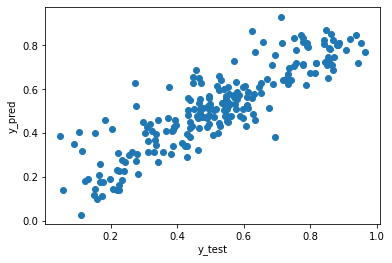

In [66]:
#Plotting y_test and y_test_pred to understand the spread of test data

fig = plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')

### R^2 value for Test data

In [67]:
r2_score(y_test,y_pred)

0.7692676164700232

### Adjusted R^2 value for TEST

In [68]:
r2 = 0.7692676164700232

In [69]:
# Get the shape of X_test
X_test.shape

(220, 10)

In [70]:
# n is the number of rows in X_test
n = X_test.shape[0]

#p is the number of features in the X_test
p = X_test.shape[1]

#Calculating Adjusted R^2 value using formula.
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7582277895068664

## Result Comparison

- Final Result :
   - Training Data Results:
      - R^2 : 0.793
      - Adjusted R^2 :0.789
      
   - Test Data Results:
      - R^2 : 0.769
      - Adjusted R^2 :0.758
      
###### By above comaprison th model seems to be good and that can very well generalize various datasets.

## FINAL REPORT

- As per our final model, the top 3 predictor variables that influence the bike bookings are : 
    - temp
    - yr
    - windspeed
- Based on the coefficients increase in temperature increases the bike bookings, also the bike booking increases in successive years when compared to the previous years.
- one should keep in mind that whenever the windspeed increases the bike booking decreases.

- Next top 3 predictor variables that influences the bike booking are: 
   - season_winter increses the bike booking percentage when comapred to all other seasons.
   - season_summer also increase the bike booking percentage compared to all other seasons except winter.
   - Bike bookings is high in month of september when comapared to all other months.
- Bike booking also decreases when there is sunday or on any holidays or even when the weather is  Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

###### For a company to achieve maximum bookings in a year, it is recommended to come with exciting offers in every successive year in the month of september, when the day should not be an holiday or sunday and the windspeed should be minimum and the day should have high temperature.